# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head(5000)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,Internet,RoundTrip,214,17,8,Sun,CMBMEL,Australia,0,0,0,8.83,0
4996,2,Internet,RoundTrip,69,18,20,Tue,CMBMEL,Australia,1,1,1,8.83,0
4997,1,Internet,RoundTrip,113,23,4,Fri,CMBMEL,Australia,0,0,0,8.83,0
4998,1,Internet,RoundTrip,62,24,23,Wed,CMBMEL,New Zealand,1,1,1,8.83,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.shape

(50000, 14)

In [9]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.std()

/var/folders/_0/cszr694n63s0ph8vl6k3zw680000gn/T/ipykernel_518/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


num_passengers            1.020165
purchase_lead            90.451378
length_of_stay           33.887670
flight_hour               5.412660
flight_day                1.992792
wants_extra_baggage       0.470657
wants_preferred_seat      0.456923
wants_in_flight_meals     0.494668
flight_duration           1.496863
booking_complete          0.356643
dtype: float64

In [12]:
from scipy.stats import kurtosis,skew
print(skew(df.num_passengers))

2.6908276665007897


In [13]:
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


In [14]:
from scipy import stats
r,p=stats.pearsonr(df.num_passengers,df.purchase_lead)

In [15]:
print(r)

0.21260577575608372


In [16]:
corr_df=pd.DataFrame(columns=['r', 'p'])
for col in df:
    if pd.api.types.is_numeric_dtype(df[col])and col !='num_passengers':
        r,p = stats.pearsonr(df.num_passengers,df[col])
        corr_df.loc[col] =[round(r,3),round(p,3)]
corr_df

,r,p
purchase_lead,0.213,0.000
length_of_stay,-0.116,0.000
flight_hour,0.016,0.000
flight_day,0.015,0.001
wants_extra_baggage,0.120,0.000
wants_preferred_seat,0.029,0.000
wants_in_flight_meals,0.023,0.000
flight_duration,-0.063,0.000
booking_complete,0.024,0.000


In [17]:
import matplotlib.pyplot as plt


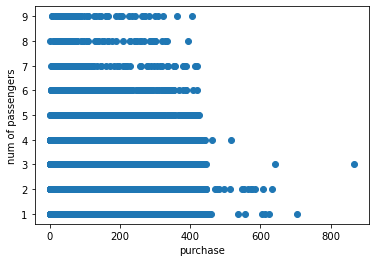

In [18]:
plt.scatter(df.purchase_lead,df.num_passengers)
plt.xlabel("purchase")
plt.ylabel("num of passengers")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x=df.drop(['booking_complete'],axis=1)
y=df['booking_complete']
x

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62


In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [22]:
train_df=x_train.join(y_train)
train_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
27434,2,Internet,RoundTrip,36,3,5,3,DPSKIX,Japan,0,0,0,7.00,0
13400,1,Internet,RoundTrip,31,19,12,6,HYDSYD,Australia,1,0,1,8.58,0
883,3,Mobile,RoundTrip,412,21,11,7,AKLKUL,New Zealand,1,0,1,8.83,0
7303,1,Internet,RoundTrip,64,17,10,6,CRKMEL,Australia,1,0,0,8.83,0
45124,1,Internet,RoundTrip,33,6,8,7,DPSHND,Japan,1,0,1,7.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,Internet,RoundTrip,20,91,11,5,HANSYD,Vietnam,1,0,1,8.58,0
44732,1,Internet,RoundTrip,65,6,18,3,DMKMRU,Mauritius,1,1,1,7.42,0
38158,2,Mobile,RoundTrip,107,5,6,2,HKTHND,Thailand,1,0,0,7.57,1
860,4,Internet,RoundTrip,232,19,8,2,AKLKUL,New Zealand,0,0,0,8.83,0


array([[<AxesSubplot:title={'center':'num_passengers'}>,
        <AxesSubplot:title={'center':'purchase_lead'}>,
        <AxesSubplot:title={'center':'length_of_stay'}>],
       [<AxesSubplot:title={'center':'flight_hour'}>,
        <AxesSubplot:title={'center':'flight_day'}>,
        <AxesSubplot:title={'center':'wants_extra_baggage'}>],
       [<AxesSubplot:title={'center':'wants_preferred_seat'}>,
        <AxesSubplot:title={'center':'wants_in_flight_meals'}>,
        <AxesSubplot:title={'center':'flight_duration'}>],
       [<AxesSubplot:title={'center':'booking_complete'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

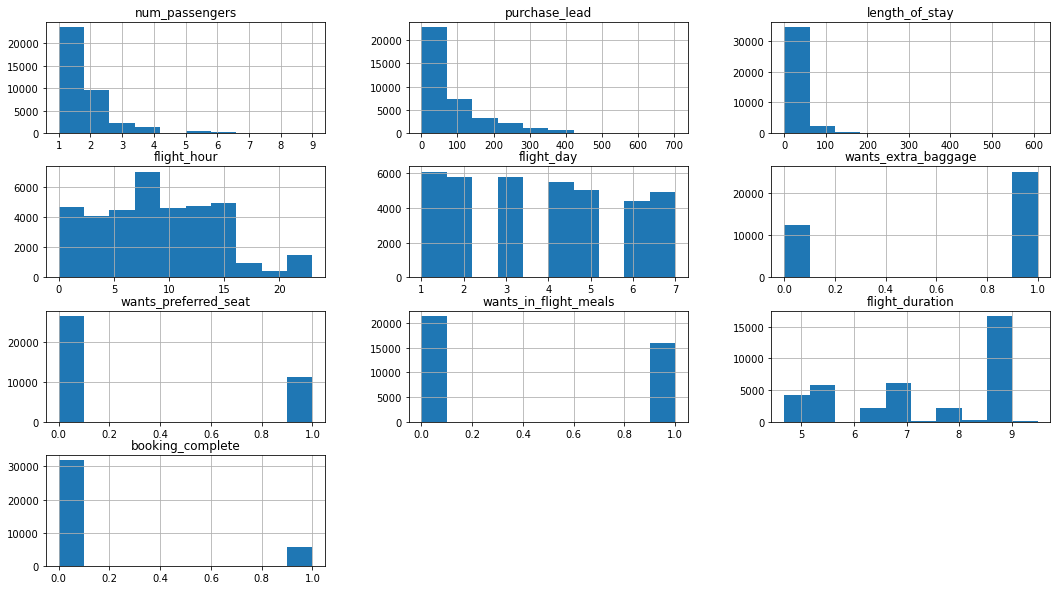

In [23]:
train_df.hist(figsize=(18,10))

<AxesSubplot:>

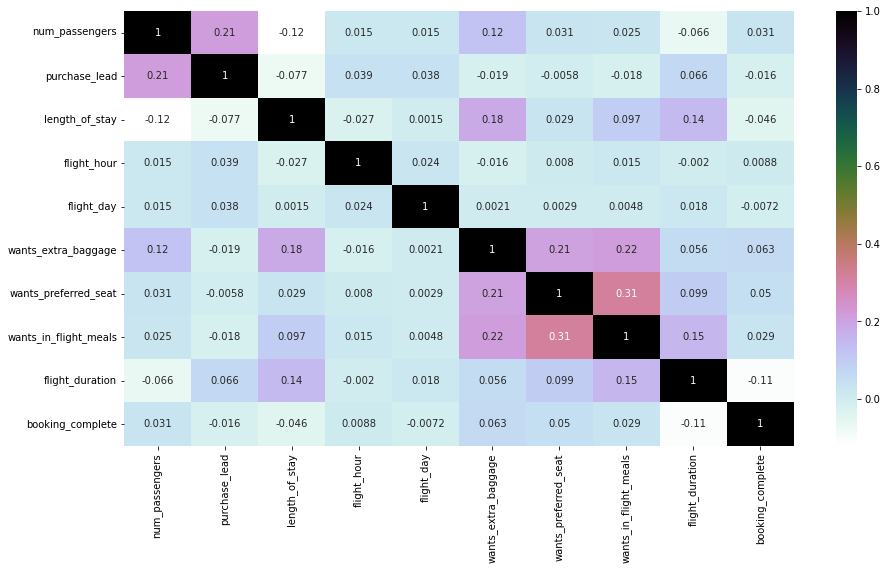

In [24]:
import seaborn as sns

plt.figure(figsize=(15,8))

sns.heatmap(train_df.corr(),annot=True,cmap="cubehelix_r")

In [25]:
train_df.flight_day.value_counts()

1    6088
2    5773
3    5763
4    5517
5    5037
7    4909
6    4413
Name: flight_day, dtype: int64

In [26]:
# Assuming your DataFrame is named train_df

# Specify the columns you want to remove
columns_to_remove = ['sales_channel', 'trip_type', 'route','booking_origin']

# Remove the specified columns from the DataFrame
train_df = train_df.drop(columns=columns_to_remove)
# Print the column names of the DataFrame
print(train_df.columns)


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the features and target variables
x = train_df.drop(['booking_complete'], axis=1)
y = train_df['booking_complete']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, max_depth=None, max_features=10, random_state=42)

# Train the classifier on the training data
rf.fit(x_train, y_train)

# Evaluate the accuracy on the entire dataset
accuracy = rf.score(x, y)
print("Accuracy on the entire dataset:", accuracy)

# Evaluate the accuracy on the test set
test_accuracy = rf.score(x_test, y_test)
print("Accuracy on the test set:", test_accuracy)

# Evaluate the accuracy on the training set
train_accuracy = rf.score(x_train, y_train)
print("Accuracy on the training set:", train_accuracy)


Accuracy on the entire dataset: 0.9676
Accuracy on the test set: 0.8396
Accuracy on the training set: 0.9996


In [31]:
y_pred=rf.predict(x_train)

In [37]:
from sklearn import metrics
import numpy as np
print('R^2:',metrics.r2_score(y_train,y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9968506295315996
MAE: 0.0004
MSE: 0.0004
RMSE: 0.02
